In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('munich.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 1 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   time;precipitation_sum (mm);snowfall_sum (cm)  153 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [3]:
# verileri ; ile ayrı sütunlara ayırıcaz, zaman sütununu time index yapacağız
df_weather = pd.read_csv(
    'munich.csv',
    sep = ';',
    parse_dates=['time'],
    index_col='time'
)

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2024-03-01 to 2024-07-31
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precipitation_sum (mm)  134 non-null    float64
 1   snowfall_sum (cm)       134 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [5]:
#veri analiz ve yorumlama
df_weather[['precipitation_sum (mm)', 'snowfall_sum (cm)']].describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation_sum (mm),134.0,3.926119,8.842600,0.0,0.0,0.75,4.875,78.40
snowfall_sum (cm),134.0,0.018582,0.113191,0.0,0.0,0.00,0.000,1.01


In [6]:
df_m = df_weather.resample('ME').mean()
df_m.head()

,precipitation_sum (mm),snowfall_sum (cm)
time,,
2024-03-31,2.491667,0.085
2024-04-30,2.403333,0.049
2024-05-31,5.825806,0.000
2024-06-30,5.233333,0.000
2024-07-31,2.790323,0.000


In [10]:
# Fonksiyon ile her tarihi bir mevsim etiketiyle eşleştirme
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Kış (DJF)'
    elif month in [3, 4, 5]:
        return 'İlkbahar (MAM)'
    elif month in [6, 7, 8]:
        return 'Yaz (JJA)'
    else: # 9, 10, 11
        return 'Sonbahar (SON)'

# Yeni bir 'Season' sütunu oluşturma
# .index.to_series() ile indeksi bir seri haline getirip apply uyguluyoruz.
df_weather['Season'] = df_weather.index.to_series().apply(get_season)

# Mevsimsel ortalamaları hesaplama
df_seasonal = df_weather.groupby('Season')[['precipitation_sum (mm)', 'snowfall_sum (cm)']].mean()

# Mevsimlerin mantıksal sırasını düzeltme (Görselleştirme için önemlidir)
season_order = ['Kış (DJF)', 'İlkbahar (MAM)', 'Yaz (JJA)', 'Sonbahar (SON)']
df_seasonal = df_seasonal.reindex(season_order)

print("\n--- 2.2 B. Mevsimlik Ortalama Hava Durumu ---")
print(df_seasonal)


--- 2.2 B. Mevsimlik Ortalama Hava Durumu ---
                precipitation_sum (mm)  snowfall_sum (cm)
Season                                                   
Kış (DJF)                          NaN                NaN
İlkbahar (MAM)                3.871233            0.03411
Yaz (JJA)                     3.991803            0.00000
Sonbahar (SON)                     NaN                NaN


In [11]:
# En şiddetli 5 yağış olayını bulma (Yağış Toplamına göre en yüksek)
top_rainfall = df_weather.sort_values(by='precipitation_sum (mm)', ascending=False).head(5)

# En yoğun 5 kar yağışı olayını bulma
top_snowfall = df_weather.sort_values(by='snowfall_sum (cm)', ascending=False).head(5)

print("\n--- 2.3 En Şiddetli 5 Yağış Olayı (Aykırı Değerler) ---")
print(top_rainfall[['precipitation_sum (mm)', 'snowfall_sum (cm)']])

print("\n--- 2.3 En Yoğun 5 Kar Yağışı Olayı (Aykırı Değerler) ---")
print(top_snowfall[['precipitation_sum (mm)', 'snowfall_sum (cm)']])


--- 2.3 En Şiddetli 5 Yağış Olayı (Aykırı Değerler) ---
            precipitation_sum (mm)  snowfall_sum (cm)
time                                                 
2024-06-01                    78.4                0.0
2024-05-06                    38.6                0.0
2024-05-27                    35.1                0.0
2024-05-31                    23.2                0.0
2024-05-30                    22.9                0.0

--- 2.3 En Yoğun 5 Kar Yağışı Olayı (Aykırı Değerler) ---
            precipitation_sum (mm)  snowfall_sum (cm)
time                                                 
2024-03-24                     4.9               1.01
2024-04-18                     9.5               0.56
2024-04-23                     4.9               0.49
2024-04-22                     2.3               0.42
2024-03-23                     6.9               0.01


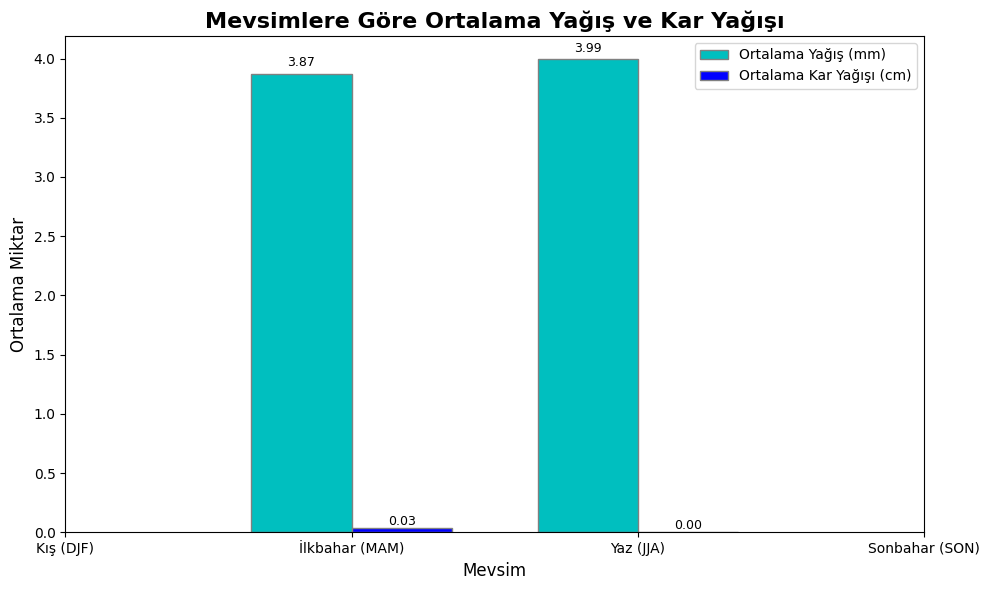

In [12]:
# df_seasonal, EDA aşamasında hesaplanmış, mevsimsel ortalamaları ve sıralamayı içeriyor.
# (Eğer önceki adımı atladıysanız, burada df_seasonal'ın hesaplandığından emin olun.)

# Veriyi Matplotlib için hazırlama
seasons = df_seasonal.index.values
avg_precip_season = df_seasonal['precipitation_sum (mm)'].values
avg_snow_season = df_seasonal['snowfall_sum (cm)'].values

# Grafiği ayarlama
fig, ax = plt.subplots(figsize=(10, 6))

# Çubukların konumu için ayarlama
bar_width = 0.35
r1 = np.arange(len(seasons)) # Yağış çubuklarının konumu
r2 = [x + bar_width for x in r1] # Kar çubuklarının konumu

# --- Çubuk 1: Ortalama Yağış ---
bars1 = ax.bar(
    r1, 
    avg_precip_season, 
    color='c', 
    width=bar_width, 
    edgecolor='grey', 
    label='Ortalama Yağış (mm)'
)

# --- Çubuk 2: Ortalama Kar Yağışı ---
bars2 = ax.bar(
    r2, 
    avg_snow_season, 
    color='b', 
    width=bar_width, 
    edgecolor='grey', 
    label='Ortalama Kar Yağışı (cm)'
)

# Başlık ve Etiketler
ax.set_title('Mevsimlere Göre Ortalama Yağış ve Kar Yağışı', fontsize=16, fontweight='bold')
ax.set_xlabel('Mevsim', fontsize=12)
ax.set_ylabel('Ortalama Miktar', fontsize=12)
ax.set_xticks([r + bar_width/2 for r in range(len(seasons))], seasons) # X ekseni etiketlerini ayarlama
ax.legend()

# Her çubuğa değeri ekleme (Matplotlib ile özelleştirme pratiği)
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1.01 * height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(ax, bars1)
add_value_labels(ax, bars2)


plt.tight_layout()
plt.show()

#